![](netflix_logo.png)

## What is Netflix?

<div style="text-align: justify">Netflix, Inc. is an American subscription-based streaming service offering online streaming movies and television series. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. As of October 2020, Netflix had over 195 million paid subscription, including 73 million in the United States. At first, Netflix business model included DVD sales and rental by email. Then in 2007, Netflix expanded its business with the introduction of streaming media while retaining the DVD and Blue-ray rental business. The company began it's international expansion in 2010 with streaming available in Canada, followed by Latin America and the Caribbean.</div>

## Dataset

<div style="text-align: justify">This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. Here the link if you want to use the dataset : <a href="https://www.kaggle.com/shivamb/netflix-shows">Netflix Dataset</a></div>

In [3]:
# import all the libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

from termcolor import colored

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the .csv file into pandas dataframe
df = pd.read_csv('netflix_titles.csv')
# observe the dataset briefly
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
# get the information of the dataframe including available features and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


<div style="text-align: justify">Before we go deeper into our analysis, we must be able to explain the dataset using a simple English. So, let me explain for you. Basically, the dataset is a collection of netflix streaming content which can be classified into two distinct group which are Movie and TV Show. The dataset also strongly highlight about the date and the place when a content was released. It has a lot of categorical feature such as genre, rating, cast, etc. The next question is what kind of analysis that can be done? From the fact that we already have, there are two ways of interpreting the data. First, we can analyze how the amount of content released varies over the year based on a categorical feature. Is there any increase or decrease trend? If yes, why it's happening? What causes significant changes in a short span of time? Definitely, we need another source of information especially the summary of the major event since the company was founded. Second, we can get statistical information for each categorical feature. For instance, in which country Netflix released the most of it's content? Is there any different about the amount of content released between months? Is there any correlation between genre? How the distribution of the rating, movie duration and TV Show seasons? Top 10 Genre? Top 10 Artist? Yeah, it's a lot of question! Our ability to ask the right question is the most important thing in data analysis. It is a direction or goals for our analysis.  
</div>

In [6]:
# check the shape of the dataset
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1],attrs=['bold'])))

There are 6234 rows and 12 columns in the dataset.


director's null rate: 31.58%
cast's null rate: 9.14%
country's null rate: 7.64%
date_added's null rate: 0.18%
rating's null rate: 0.16%


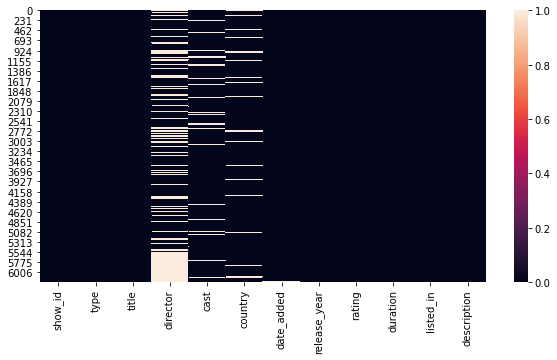

In [7]:
# Is there any null value? if yes, in which columns? how many?
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{}'s null rate: {}%".format(i,round(null_rate,2)))

<div style="text-align: justify">The 'director' column have the most null value. It's better to drop this column because it has high rate of null value. It also seems that only the famous director would be appear in our analysis. In other hand, the null rate of 'cast' column is still acceptable. We can fill the NaN value using a dummy string. For the 'country' column, I fill the NaN value with 'United States' becasue Netflix is come from USA. Meanwhile for other two columns, I will drop the NaN value because the amount of NaN value isn't significant compared to the entire dataset. However, we must be carefull not to drop the last two columns before handling NaN value in another columns</div>    

In [8]:
# drop the 'director' column
df.drop(['director'],axis=1,inplace=True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [9]:
# fill the NaN values in the 'country' column with 'United States'
df['country'].replace(np.nan,'United States',inplace=True)
# fill the NaN values in the 'cast' column with dummy string which is 'No Data'
df['cast'].replace(np.nan,'No Data',inplace=True)
# how many missing rows left?
print(colored("I will drop the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".
             format(df.isnull().sum().sum(),attrs=['bold'])))

I will drop the missing rows from the columns 'date_added' and 'rating' since these have only 21 missing rows in total.


In [10]:
# drop the remaining missing row
df.dropna(inplace=True)
# check the shape f dataset after null value handling
print(colored("There are {} rows and {} columns after handling the missing records in the dataset.".format(
df.shape[0],df.shape[1])))

There are 6214 rows and 11 columns after handling the missing records in the dataset.


## Feature Modification

From df.info(), we already know that the data type of 'date_added' column is object which is difficult to process. It's better to transform this feature into numerical or categorical such as year and month.

In [11]:
# convert the object format into datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
# create 'month_added' column, it contains the number of the month (e.g: 1 for January)
df['month_added'] = df['date_added'].dt.month
# create 'month_name_added' column, it contains the name of the month (e.g: 'December')
df['month_name_added'] = df['date_added'].dt.month_name()
# create 'year_added' column, it contains the year of the content released
df['year_added'] = df['date_added'].dt.year

In [12]:
# drop the the 'date_added' becasue it's no longer used
df.drop('date_added',inplace=True,axis=1)

In [13]:
# check the head of dataset to spot the difference
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,September,2019
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,September,2016
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9,September,2018
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9,September,2018
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9,September,2017


## Movie vs TV Show in Pie Diagram

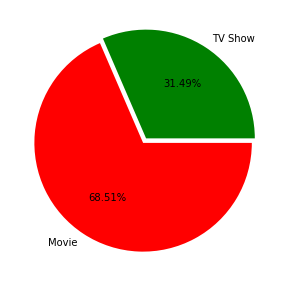

In [14]:
# create a pie diagram to compare the amount of content between Movie and TV Show
plt.figure(figsize=(10,5))
dftype = df['type'].value_counts().sort_values()
plt.pie(dftype,labels=dftype.index,explode=[0.05,0],autopct='%1.2f%%',colors=['green','red'])
plt.show()

<ul>
    <li>Movie : 68.51%</li>
    <li>Tv Show : 31.49%</li>
</ul>

<div style="text-align: justify">What you can tell from this pie diagram? Maybe, you will say that Netflix has more Movie than TV Show. Yes it's correct, but remember that our dataset in only record the title of a particular content as an individual record. Yeah, this isn't a problem for the Movie becasue a Movie must only have one content uploaded. Even if the movie has a series, it's still different title which means different record. In contrast, a TV Show usually has a lot of episode and seasons, but it can only have one record. This is one of basic reason why TV Show look like has less amount of content than Movie. We must to be critical on an information.</div>   

## Top 20 Countries

In [15]:
# import Counter from collections library
from collections import Counter

<div style="text-align: justify">If we look again at 'country' column, we found that a content could be released at more than one country. The best option to deal with this situation is transform the data in each row into single list.</div>

In [16]:
# create a Series that show the count of country where a content released
country_count = pd.Series(dict(Counter(','.join(df['country']).replace(', ',',').replace(' ,',',').replace(' , ',',').split(',')))).sort_values(ascending=False)

In [17]:
# pick 20 top
top_20_country = country_count.head(20)

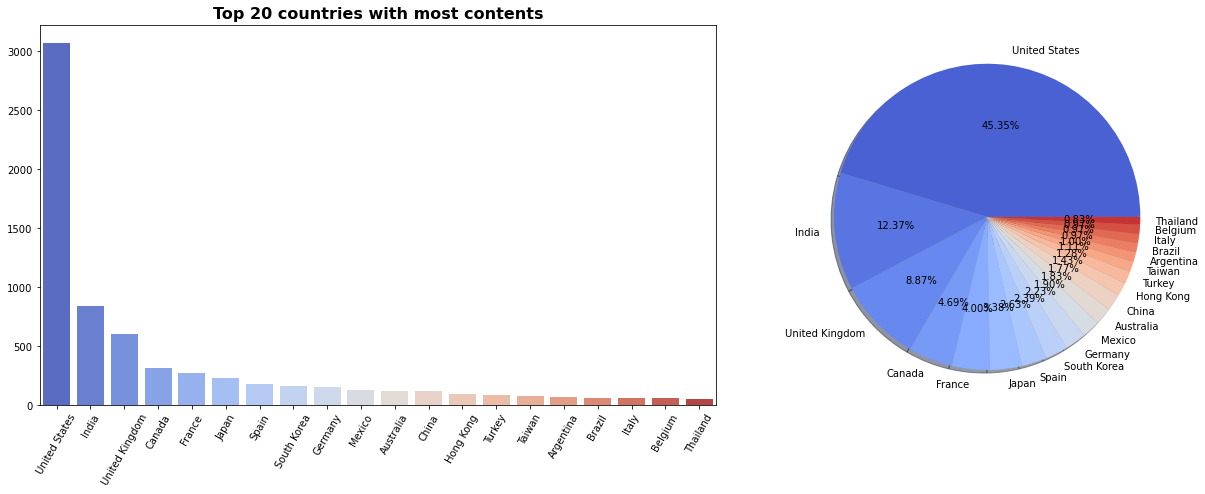

In [18]:
# visualize the data into bar plot and pie diagram
from matplotlib import gridspec

fig = plt.figure(figsize=(20,7))
gs = gridspec.GridSpec(nrows=1,ncols=2,height_ratios=[6],width_ratios=[10,5])

ax = plt.subplot(gs[0])
sns.barplot(top_20_country.index,top_20_country,ax=ax,palette="coolwarm")
ax.set_xticklabels(top_20_country.index,rotation=60)
ax.set_title('Top 20 countries with most contents',fontsize=16,fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top_20_country,labels=top_20_country.index,shadow=True,startangle=0,colors=sns.color_palette('coolwarm',n_colors=20),autopct='%1.2f%%')
ax2.axis('equal')

plt.show()

<div style="text-align: justify">From the chart above, we can see that the majority of Netflix content was released in United States. This isn't a suprising fact. We already know that Netflix comes from USA and the majority of the worldwide movie was produced and released in there first. Then, how can we explain the trend for another country? Of course, we should use our business logic here. In general, a business is driven by the market cap. For instance, let's discuss about Netflix market in India. Quoted from article in <em>Tech in Asia</em> site which titled <em>"India might be the last frontier for Netflix in the global streaming war" </em> <a href="https://www.techinasia.com/india-netflix-streaming-war">(link)</a>,<br><br><em>"Over the last two years, India has become a new battleground for video-streaming services. According to a BCG report, the Indian SVOD market is expected to touch USD 1.5 billion by 2023 from USD 0.1 billion in 2018. Relying on a mix of licensed and original content has been the cornerstone for Netflix as far as its content strategy goes. It implemented the same strategy in India and with TV shows such as House of Cards, Stranger Things, and 13 Reasons Why. It managed to get initial popularity in India, but couldn’t create the habit pattern among users which it did in the US. However, by 2018, after realizing it couldn’t compete with local production houses that dominated the premium regional content, Netflix shifted its focus to local-language shows. Now the competition has become more about original and exclusive content because that would get them dedicated users. To ramp up its regional content production, Netflix partnered with Bollywood filmmakers including Karan Johar, Farah Khan, and Ronnie Screwvala in April 2019 as it announced 10 new original films."</em><br><br>From above article, we can learn that market has become a great factor to decide where a content should be released. It is make sense because a big market will give high revenue and profit. It was also supported with the large population in India.</div>

## Contents added over the year

In [19]:
# seperate the dataframe by 'type'
df_tv = df[df['type']=='TV Show']
df_movie = df[df['type']=='Movie']

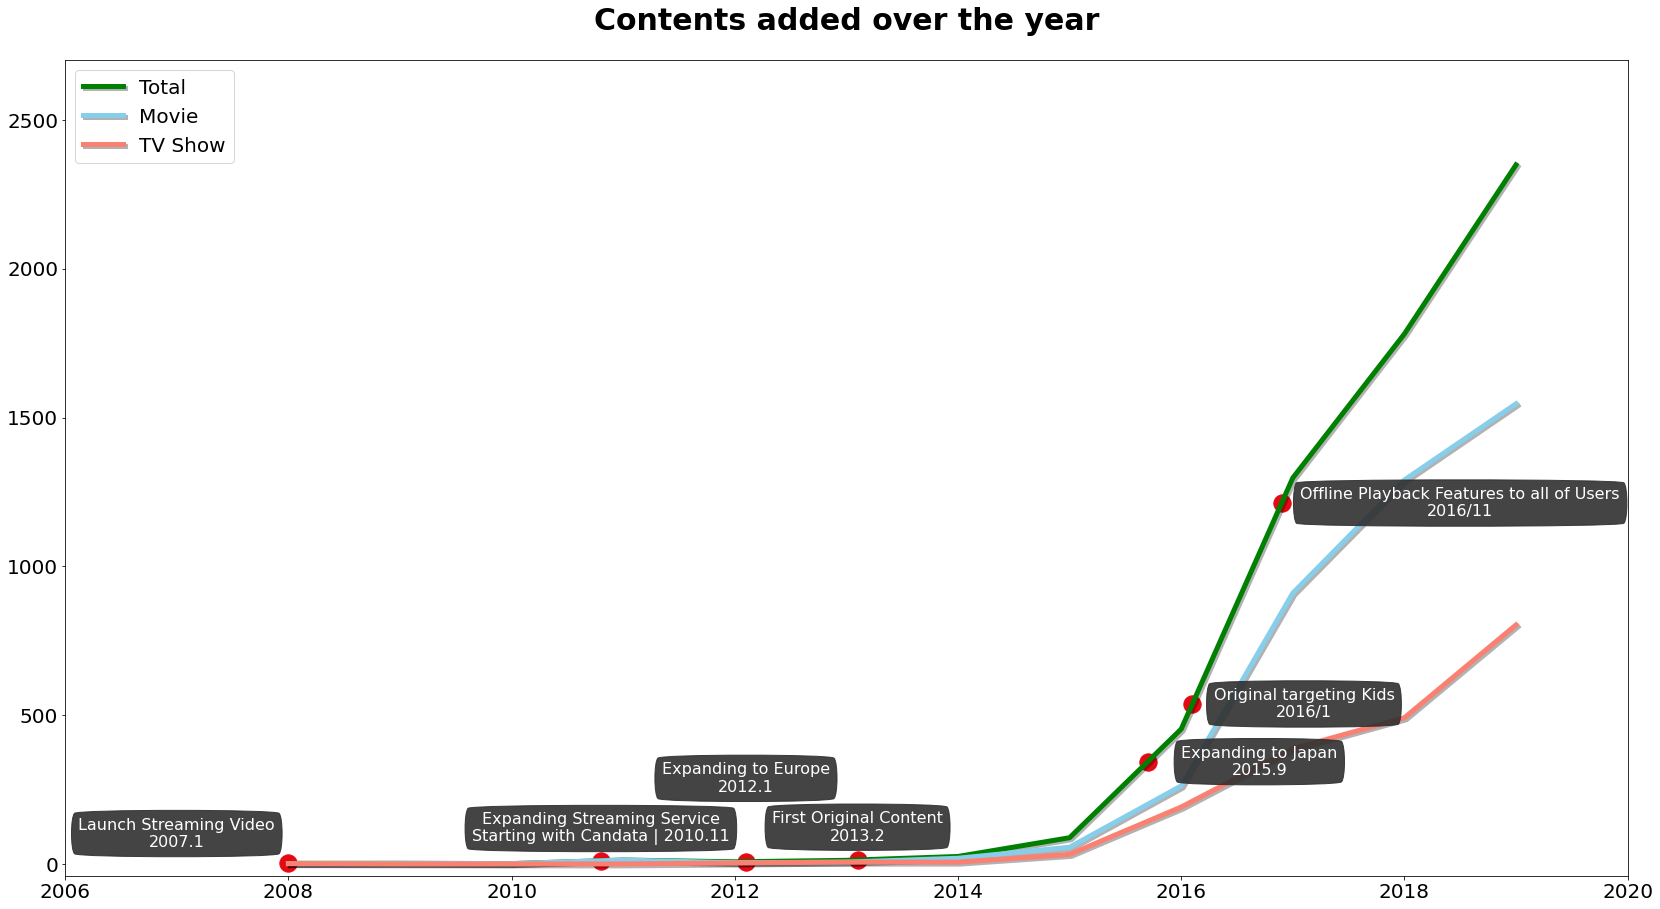

In [41]:
import matplotlib.patheffects as path_effects
year_data = df['year_added'].value_counts().sort_index().loc[:2019]
type_data = df.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="green", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

# the information can be obtained from the Wikipedia page
# time of the event
t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

# event description
events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

# coordinate of the annotation
up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_title("Contents added over the year", position=(0.5, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

<div style="text-align: justify">As we can see, Netflix content's started to grow when they released content overseas. Started with Canada in 2010, Netflix continue to expand its business at Europe in 2012. The next move netflix had been done was releasing its first original content in February, 2013. From that, Netflix content's soared up exponentionally. We can also notice that there is such unique trend between Movie and TV Show. Whenever one of this group content increment rate's decreases, the other group will increase. It is also obvious that Netflix see a good market in TV Show rather than Movie in the recent year. This strategy has more tendency to make a habbit which means more loyal subsribers.</div>

## Contents over the month

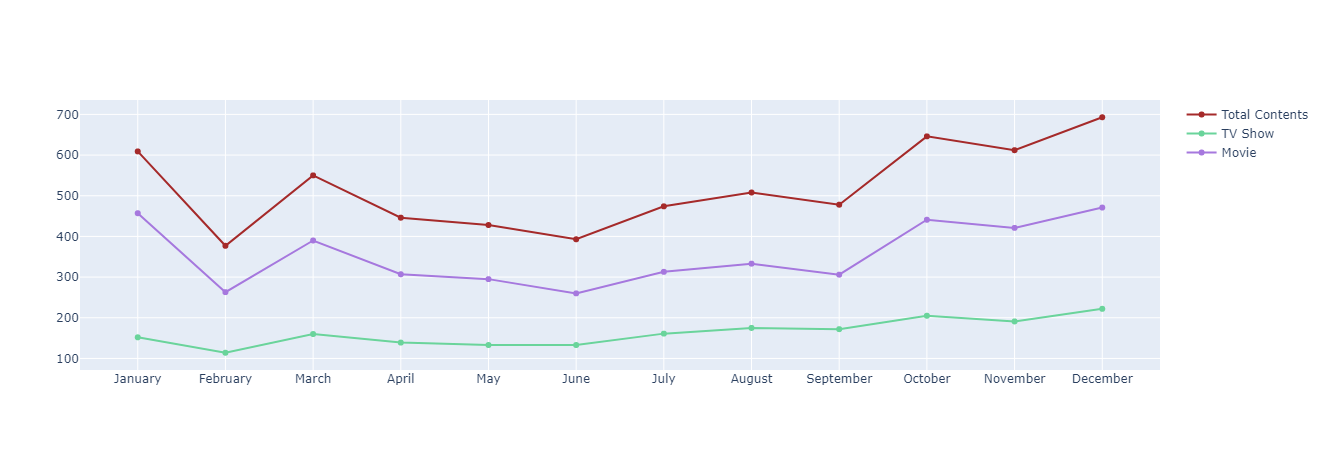

In [22]:
# visualize the contents over the month
df_month_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0:'count'}).sort_values('month_added',ascending=True).drop('month_added',axis=1)
df_month_content['percent'] = round(df_month_content['count'] / sum(df_month_content['count']) * 100,2)

df_month_tv = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0:'count'}).sort_values('month_added',ascending=True).drop('month_added',axis=1)
df_month_tv['percent'] = round(df_month_tv['count'] / sum(df_month_tv['count']) * 100,2)

df_month_movie = df_movie[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0:'count'}).sort_values('month_added',ascending=True).drop('month_added',axis=1)
df_month_movie['percent'] = round(df_month_movie['count'] / sum(df_month_movie['count']) * 100,2)

month_content = go.Scatter(x=df_month_content['month_name_added'],y=df_month_content['count'],name='Total Contents',marker=dict(color='brown'))
month_tv = go.Scatter(x=df_month_tv['month_name_added'],y=df_month_tv['count'],name='TV Show',marker=dict(color='#6ad49b'))
month_movie = go.Scatter(x=df_month_movie['month_name_added'],y=df_month_movie['count'],name='Movie',marker=dict(color='#a678de'))

month_data = [month_content,month_tv,month_movie]

month_layout = go.Layout(title='Content added over the month', legend=dict(x=0.1,y=1.1,orientation="h"))
month_fig = go.Figure(month_data)
month_fig.show()

<div style="text-align: justify">For the simplication, let's discuss about the highest and the lowest. From above chart, February is the month with the lowest amount of content released. The explanation is the present of dump month in movie industry. A dump month is the period of the year where the commercial and critical expectations for films are exceedingly low. Subscribers tend to be at their busiest during these periods, keeping them away from watching movie or TV Show. Months included in the this period are January, February, and sometimes August and September. The main reason behind February's small amount of content released is that they come after December which is considered as profitable month due to the Christmas and New Year holidays seasons. Secondly, there is higher possibility of winter storm in February which means people will make a preparation rather than enjoying some entertainment.</div>

## Genre Relationship

In [23]:
# make a funtion that show genre relation heatmap using MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,',',').replace(', ',',').replace(' , ',',').split(','))
    Types = []
    for i in df['genre']:
        Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test),columns=mlb.classes_,index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10,8))
    relation = sns.heatmap(corr,mask=mask,cmap='coolwarm',vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    plt.show

**Movie**

There are 20 types in the Netflix Movie Dataset


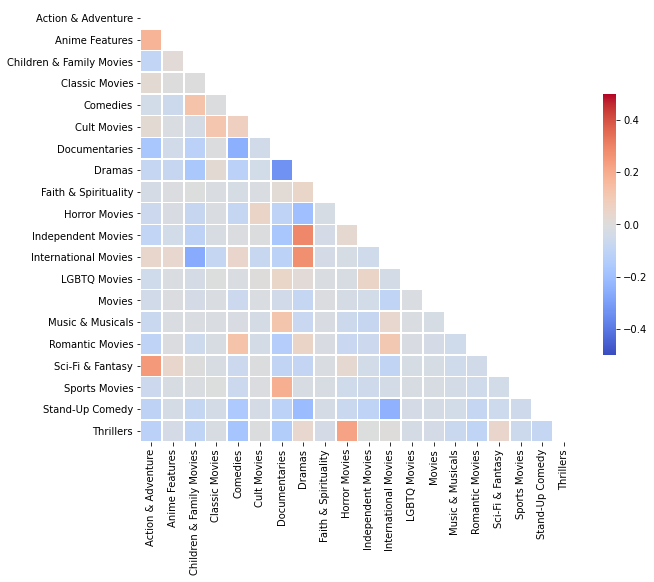

In [24]:
# create the relation heatmap for 'Movie'
relation_heatmap(df_movie,'Movie')

<div style="text-align: justify">As you can see, there is strong relationship between Dramas and International and Independent Movies. It's not a suprising fact. Today, a lot of movie dramas that had been produced inside the local country was brought to international market such as Korean Drama which is one of the most popular drama at the moment. Sometimes, a drama contains some cultural aspect of the country where the movie originated from. It also usually made by its local produiction house. In contrast, dramas and documentaries are strongly not correlated to each other. The reason is obvious. Documentaries is based on true event while almost of all dramas are based on a story that had been writen before.</div>

**TV Show**

There are 22 types in the Netflix TV Show Dataset


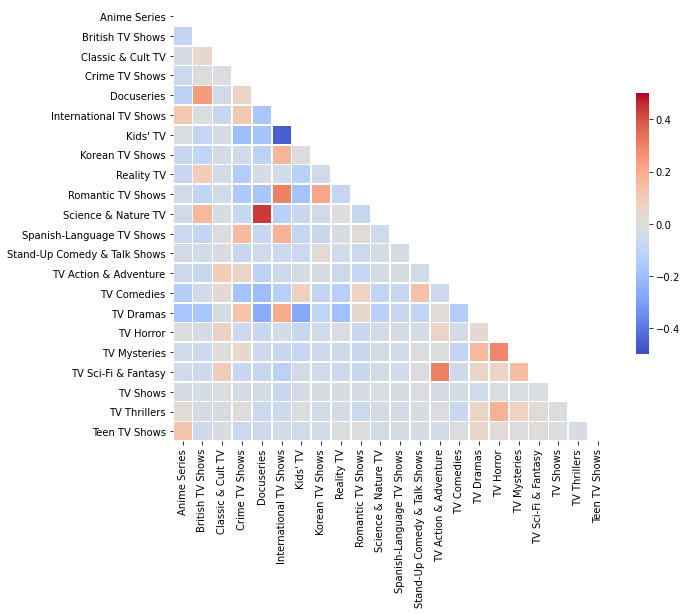

In [25]:
# create the relation heatmap for 'TV Show'
relation_heatmap(df_tv,'TV Show')

Meanwhile for the TV Show, Docuseries seems to be highly correlated to Science & Nature TV. Another strong correlation also appear between TV Horror and TV Mysteries. In other hand, Kid's TV and International TV Shows has negative correlation.

## Rating Distribution

[How does Netflix decide the maturity rating on TV shows and movies? (USE ver.)](https://help.netflix.com/en/node/2064/us)

In [26]:
# set the rating that belongs to a specific group
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [27]:
# count the rating appearance
movie_rating = df_movie['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [28]:
# make a function that creates a bar plot that shows rating distribution
def rating_barplot(data,title,height,h_lim=None):
    fig, ax = plt.subplots(1,1,figsize=(15,8))
    if h_lim:
        ax.set_ylim(0,h_lim)
    ax.bar(data.index,data,color="#d0d0d0",width=0.6,edgecolor='black')
    color = ['green','blue','orange','red']
    span_range = [[0,2],[3,6],[7,8],[9,11]]
    for idx, sub_title in enumerate(['Little Kids','Older Kids','Teens','Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2,height),
                    xytext=(0,0), textcoords='offset points',
                    va='center',ha='center',
                    color='w',fontsize=16,fontweight='bold',
                    bbox=dict(boxstyle='round4',pad=0.4,color=color[idx],alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,color=color[idx],alpha=0.1)
    ax.set_title(f'Distribution of {title} Rating',fontsize=20,fontweight='bold',position=(0.5,1.0+0.03))
    plt.show

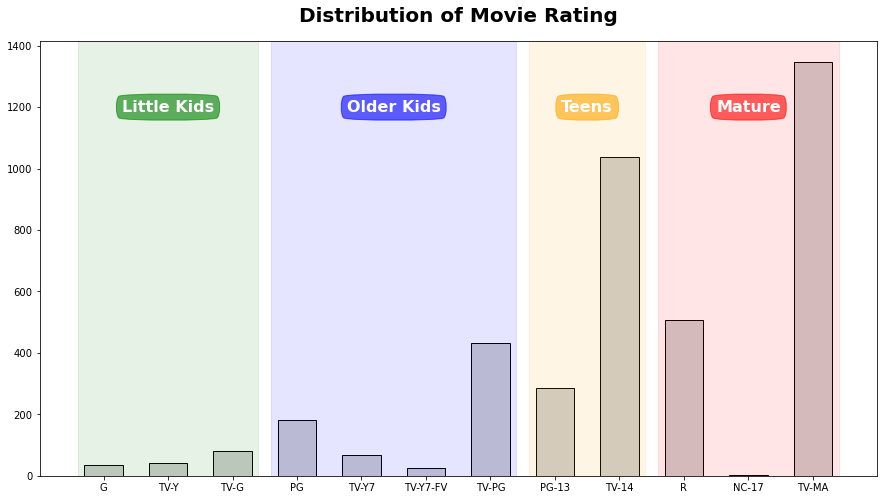

In [29]:
# call the funtion for the 'Movie' group
rating_barplot(movie_rating,'Movie',1200)

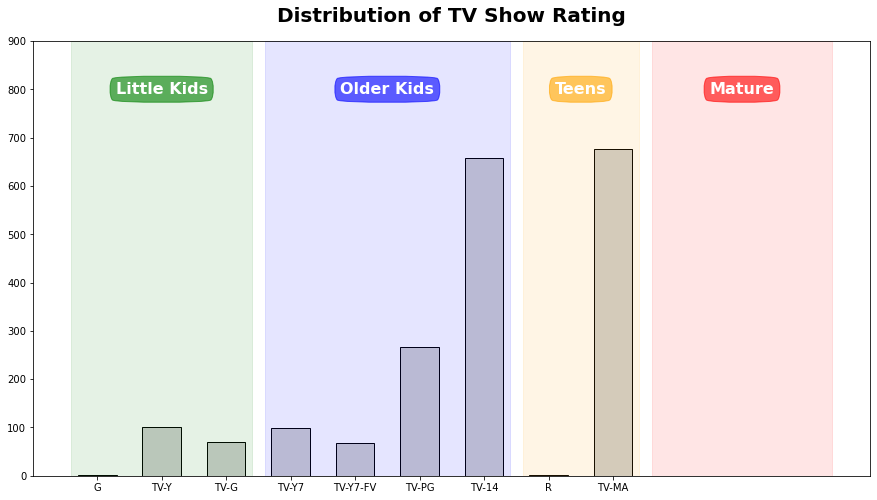

In [30]:
# call the funtion for the 'TV Show' group
rating_barplot(tv_rating,'TV Show',800,900)

## Distribution of Movie Duration

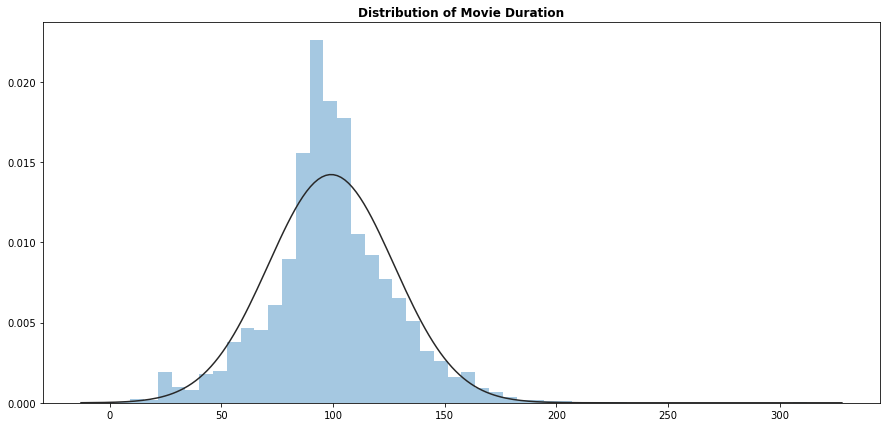

In [31]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movie['duration'].str.extract('(\d+)'),fit=norm,kde=False)
plt.title('Distribution of Movie Duration',fontweight='bold')
plt.show()

## Distribution of TV_Show Seasons

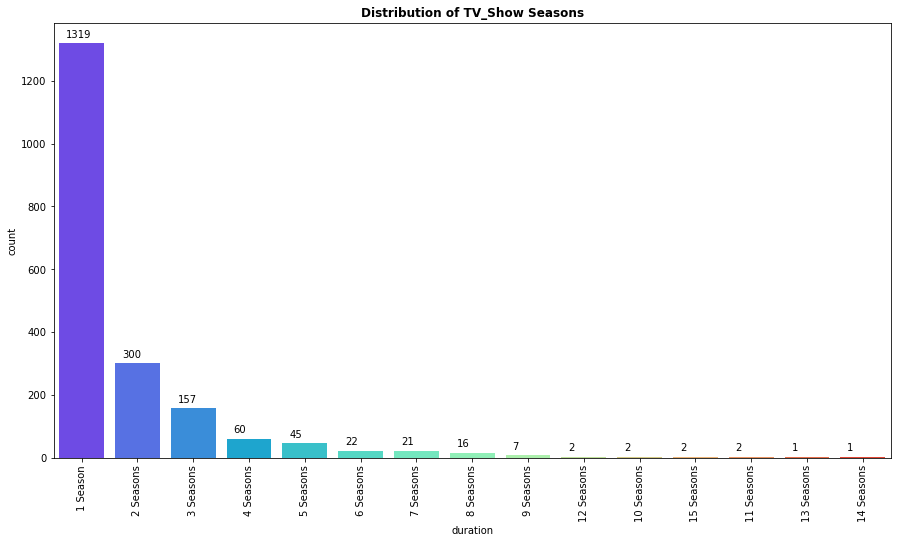

In [32]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df_tv['duration'],order=df_tv['duration'].value_counts().index,palette='rainbow')
plt.title('Distribution of TV_Show Seasons',fontweight='bold')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() + 0.12,p.get_height() + 20))
plt.show()

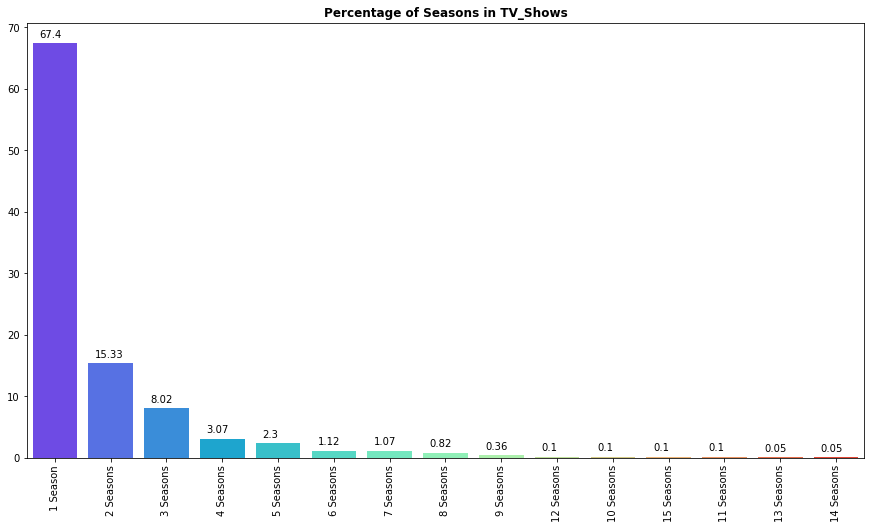

In [33]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=((df_tv['duration'].value_counts()/df_tv.shape[0])*100).index,
                 y=round(((df_tv['duration'].value_counts()/df_tv.shape[0])*100),2).values,palette='rainbow')
plt.title('Percentage of Seasons in TV_Shows',fontweight='bold')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() + 0.12,p.get_height() + 1))
plt.show()

## Top 10 Genre

In [34]:
def top_10_genre(df,title):
    plt.figure(figsize=(15,8))
    sns.barplot(x=df['listed_in'].value_counts().head(10).index,
               y=df['listed_in'].value_counts().head(10).values,
               palette='RdGy')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 Genre in {title}',fontweight='bold')
    plt.show()

**Movie**

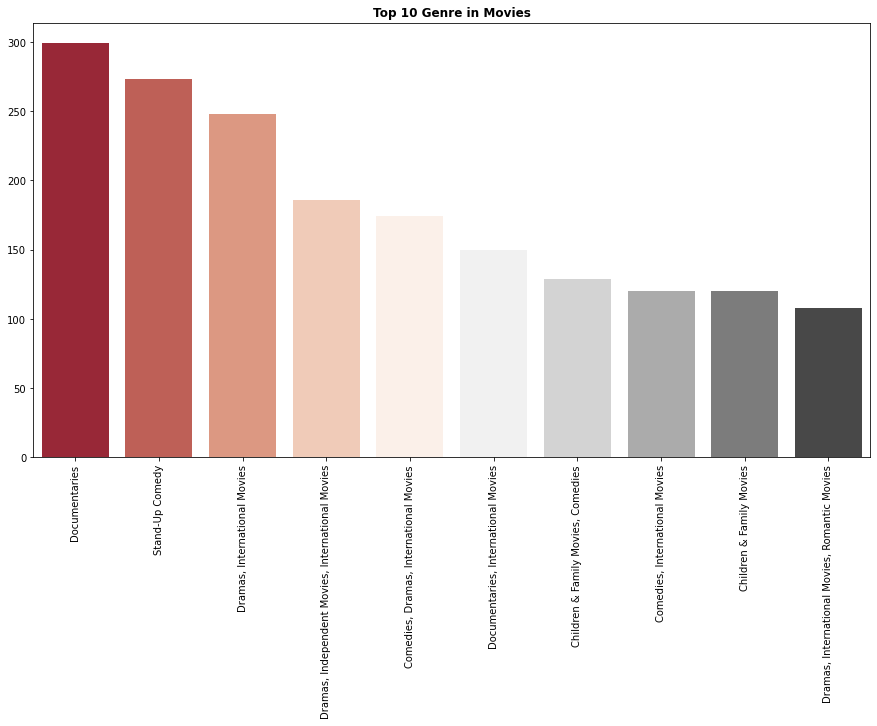

In [35]:
top_10_genre(df_movie,'Movies')

**TV Show**

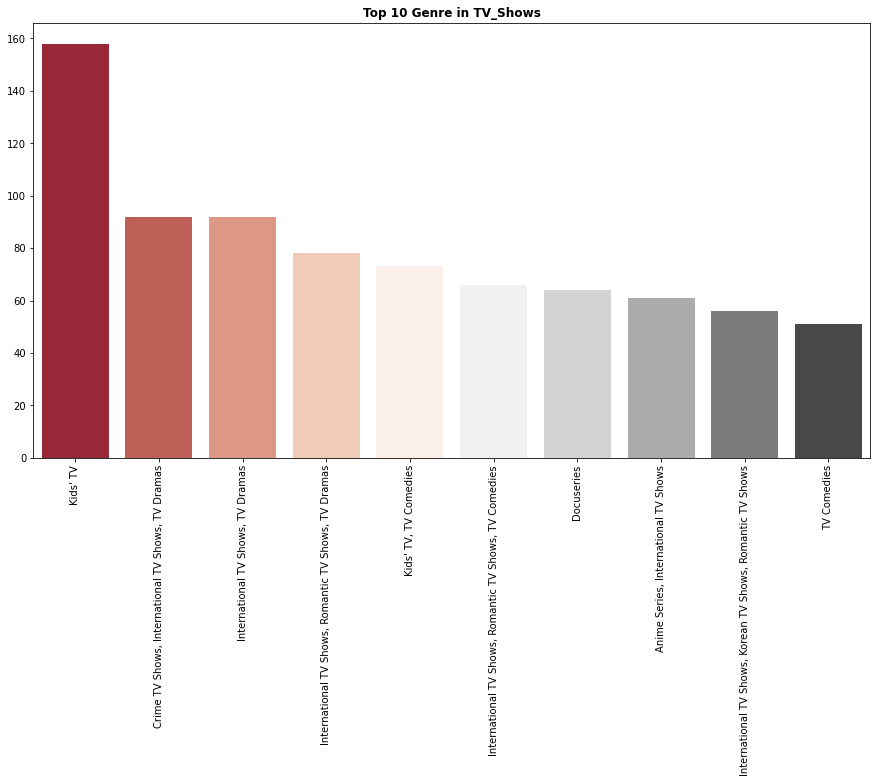

In [36]:
top_10_genre(df_tv,'TV_Shows')

## Top 10 Artist on Netflix

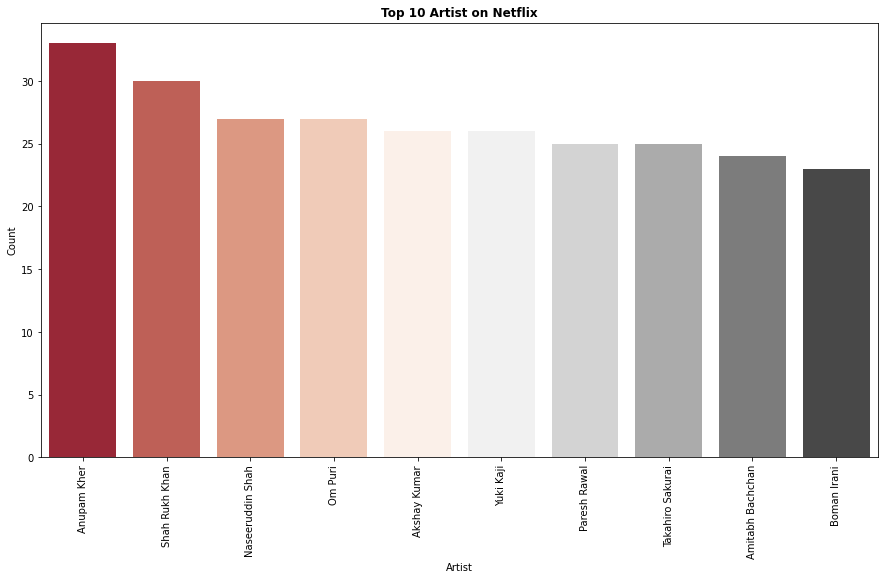

In [37]:
df['cast_name'] = df['cast'].apply(lambda x: x.replace(' ,',',').replace(', ',',').replace(' , ',',').split(','))
cast_count = []
for i in df['cast_name']:
    cast_count += i
cast_dict = dict((i,cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
columns = {'index':'Artist',0:'Count'}).iloc[1:11]

plt.figure(figsize=(15,8))
sns.barplot('Artist','Count',data=df_cast_count,palette='RdGy')
plt.title('Top 10 Artist on Netflix',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

# Thank You!